In [13]:
import os
import pandas as pd
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

from functools import partial # to reduce df memory consumption by applying to_numeric

import sklearn 

from sklearn.metrics import mean_squared_error
%matplotlib inline

In [4]:
solar_pred = '../DataSets/Solar_Train_Pred.csv'
solar_act = '../DataSets/Solar_Train.csv'

pred_df = pd.read_csv(solar_pred)
act_df = pd.read_csv(solar_act)
pred_df.head()

,hour1,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,hour24
0,0,0,0,0,0,0,0.0,6.03,14.88,19.01,...,23.79,17.13,9.34,0.11,0,0,0,0,0,0
1,0,0,0,0,0,0,0.0,6.73,13.99,22.21,...,22.49,15.38,8.95,0.14,0,0,0,0,0,0
2,0,0,0,0,0,0,0.0,6.36,16.78,22.34,...,14.32,16.70,10.19,0.19,0,0,0,0,0,0
3,0,0,0,0,0,0,0.0,5.96,18.18,21.19,...,19.75,18.38,9.82,0.19,0,0,0,0,0,0
4,0,0,0,0,0,0,0.0,4.91,12.33,17.79,...,15.15,11.35,7.30,0.13,0,0,0,0,0,0


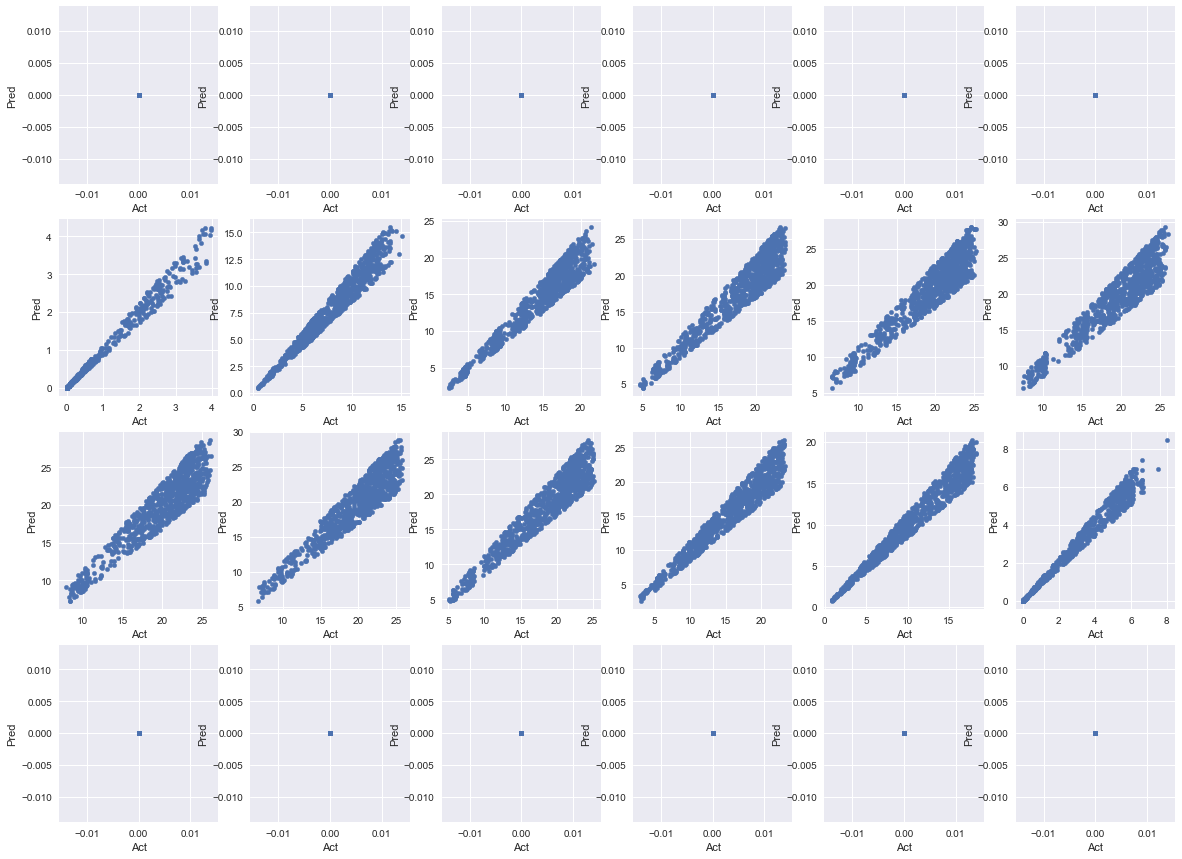

In [36]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))

k = 0
rmse = []
for i in range(4):
    for j in range(6):
        pred, act = pred_df.iloc[:,k], act_df.iloc[:,k]
        df = pd.DataFrame(columns=['Pred','Act'])
        df['Pred'], df['Act'] = pred, act
        rms = np.sqrt(mean_squared_error(act, pred))
        df.plot.scatter('Act', 'Pred',ax=axes[i,j],subplots=True)
        k+=1
        rmse.append(rms)
    

In [35]:
df = pd.DataFrame(columns=['Pred','Act'])

for i in range(24):
    pred, act = pred_df.iloc[:,i], act_df.iloc[:,i]
    temp = pd.DataFrame(data=None,columns=['Pred','Act'])
    temp['Pred'] = pred
    temp['Act'] = act
    df = df.append(temp,ignore_index=True)
act, pred = df['Act'], df['Pred']
# print df.iloc[7000:7200]
rms = np.sqrt(mean_squared_error(act, pred))
print rms


0.971685610641


In [43]:
res = []
for item in rmse:
    if(item!=0):
        res.append(item)
# print res
res = np.asarray(res)
rmse = np.asarray(rmse)
print res.mean(), rmse.mean()

1.25116321082 0.625581605411
